In [83]:
import pandas as pd
# Importing and converting the data
training_data = pd.read_csv('./data.csv')
training_data_x = training_data['length'].to_numpy()
training_data_y = training_data['weight'].to_numpy()

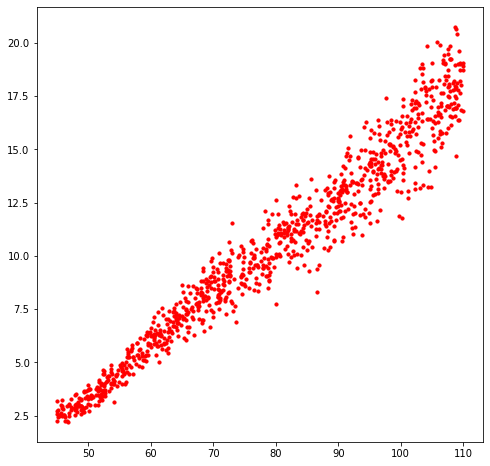

In [84]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(8, 8))
plt.scatter(training_data_x, training_data_y, c='red', s=10, label='Original data')
plt.show()

In [85]:
import torch
torch.set_default_dtype(torch.float64)
# Training the model
x_train = torch.reshape(torch.tensor(training_data_x), (-1, 1))
y_train = torch.reshape(torch.tensor(training_data_y), (-1, 1))

w1 = torch.rand(1, 1, requires_grad=True)
b1 = torch.rand(1, requires_grad=True)
lr = 0.0001
epochs = 600000
stepping = 10000

In [86]:
# Training the model with with manual optimizer

for i in range(1, epochs):
    y_pred = ((x_train @ w1) + b1)

    loss = (((y_pred - y_train).pow(2).sum())/training_data_y.size)


    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss.item())

    loss.backward()

    with torch.no_grad():
        w1 -= lr * w1.grad
        b1 -= lr * b1.grad
        w1.grad.zero_()
        b1.grad.zero_()

print("trained w1: ",w1)
print("trained b1: ",b1)


iteration:  10000 loss:  4.6511958964706315
iteration:  20000 loss:  3.9339080028287707
iteration:  30000 loss:  3.357310675181598
iteration:  40000 loss:  2.893808528837187
iteration:  50000 loss:  2.52121880397234
iteration:  60000 loss:  2.2217097204227794
iteration:  70000 loss:  1.9809470661084974
iteration:  80000 loss:  1.7874081756498483
iteration:  90000 loss:  1.6318304668617436
iteration:  100000 loss:  1.5067681426208595
iteration:  110000 loss:  1.4062358422909194
iteration:  120000 loss:  1.3254221882110184
iteration:  130000 loss:  1.2604595178621767
iteration:  140000 loss:  1.2082387813183235
iteration:  150000 loss:  1.166260745154813
iteration:  160000 loss:  1.1325163815787538
iteration:  170000 loss:  1.1053907183219502
iteration:  180000 loss:  1.0835855476461727
iteration:  190000 loss:  1.0660572953893228
iteration:  200000 loss:  1.0519670765257143
iteration:  210000 loss:  1.040640546948492
iteration:  220000 loss:  1.0315356300195508
iteration:  230000 loss: 

In [87]:
training_data_optim = pd.read_csv('./data.csv')
training_data_x_optim = training_data_optim['length'].to_numpy()
training_data_y_optim = training_data_optim['weight'].to_numpy()

x_train_optim = torch.reshape(torch.tensor(training_data_x_optim), (-1, 1))
y_train_optim = torch.reshape(torch.tensor(training_data_y_optim), (-1, 1))

w2 = torch.rand(1, 1, requires_grad=True)
b2 = torch.rand(1, requires_grad=True)

optimiser = torch.optim.SGD([{'params': w2 }, {'params': b2}], lr=0.0001)


for i in range(1, epochs):
    optimiser.zero_grad()

    y_pred_optimised = ((x_train_optim @ w2) + b2)

    loss_optimised = (((y_pred_optimised - y_train_optim).pow(2).sum())/training_data_y_optim.size)

    if i % stepping == 0:
        print ("iteration: ", i, "loss: ", loss_optimised.item())

    loss_optimised.backward()
    optimiser.step()

print("trained optimised w2: ",w2)
print("trained optimised b2: ",b2)


iteration:  10000 loss:  4.7106238912024585
iteration:  20000 loss:  3.9816796482915473
iteration:  30000 loss:  3.3957122756481746
iteration:  40000 loss:  2.924677947382635
iteration:  50000 loss:  2.54603342080485
iteration:  60000 loss:  2.2416571388569237
iteration:  70000 loss:  1.9969819500993247
iteration:  80000 loss:  1.8002979390770681
iteration:  90000 loss:  1.6421920012080182
iteration:  100000 loss:  1.5150973407954689
iteration:  110000 loss:  1.4129313315798184
iteration:  120000 loss:  1.3308044081892096
iteration:  130000 loss:  1.2647860563186994
iteration:  140000 loss:  1.2117167021561204
iteration:  150000 loss:  1.1690564982668075
iteration:  160000 loss:  1.1347637689770709
iteration:  170000 loss:  1.1071972977714934
iteration:  180000 loss:  1.085037780274137
iteration:  190000 loss:  1.0672246836302575
iteration:  200000 loss:  1.0529054904401527
iteration:  210000 loss:  1.0413948981094237
iteration:  220000 loss:  1.0321420209364385
iteration:  230000 loss

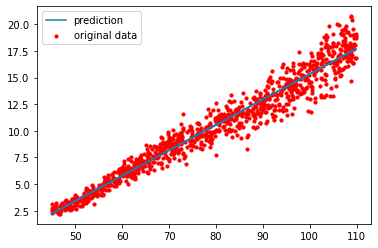

In [88]:
predicted_tensor = ((x_train @ w1).clamp(min=0) + b1).detach().numpy()

plt.scatter(training_data_x, training_data_y, c='red', s=10, label='original data')

plt.plot(training_data_x, predicted_tensor, label='prediction')

plt.legend()

plt.show()

scikit w1:  [[0.23857938]]
scikit b1:  [-8.52676636]


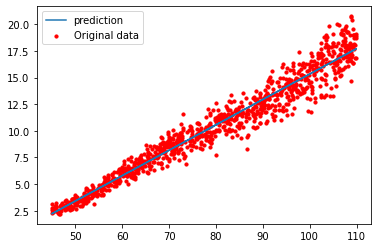

In [89]:
# scikit reference
import sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print("scikit w1: ", reg.coef_)
print("scikit b1: ", reg.intercept_)
scikit_prediction = reg.predict(x_train)

plt.scatter(training_data_x, training_data_y, c='red', s=10, label='Original data')

plt.plot(x_train, scikit_prediction, label='prediction')

plt.legend()

plt.show()